In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
df = pd.read_csv(r'D:\Data Science\iNeuron\ML\Classification\Insurance Premium Prediction\data\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [18]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
numerical_cols = df.columns[df.dtypes != 'object']
categorical_cols = df.columns[df.dtypes == 'object']

In [6]:
numerical_cols

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

## Feature Engineering Process

### Numerical Columns

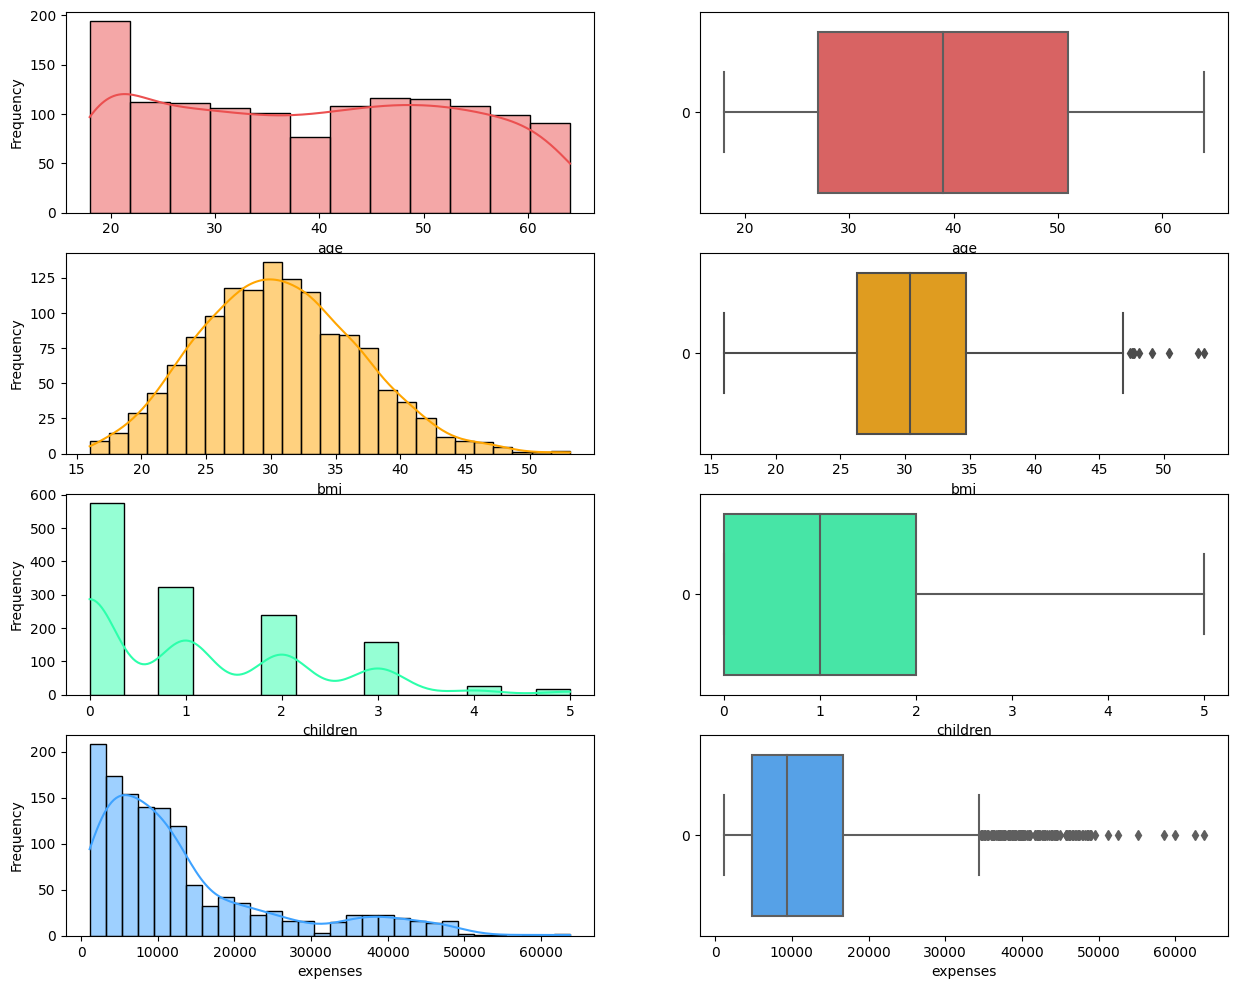

In [7]:
num_rows = len(numerical_cols)
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

color = ['#EB5050', 'orange', '#2DFFAB', '#3EA2FF']

# Loop through each feature
for i, col in enumerate(numerical_cols):
    # Plot the histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color=color[i])
    axes[i, 0].set_xlabel(col)  # Set x-axis label
    axes[i, 0].set_ylabel("Frequency")  # Set y-axis label
    
    # Plot the box plot
    sns.boxplot(df[col], orient='h', ax=axes[i, 1], color=color[i])
    axes[i, 1].set_xlabel(col)  # Set x-axis label
    axes[i, 1].set_ylabel("")  # No y-axis label for box plot

    # # Set titles for subplots
    # axes[i, 0].set_title(f'{col} - Histogram')
    # axes[i, 1].set_title(f'{col} - Box Plot')

Observation: 

There are some outlier in bmi.
Ans also in expenses, but it is a dependent feature.

#### Handling outliers

### Categorical columns

In [8]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

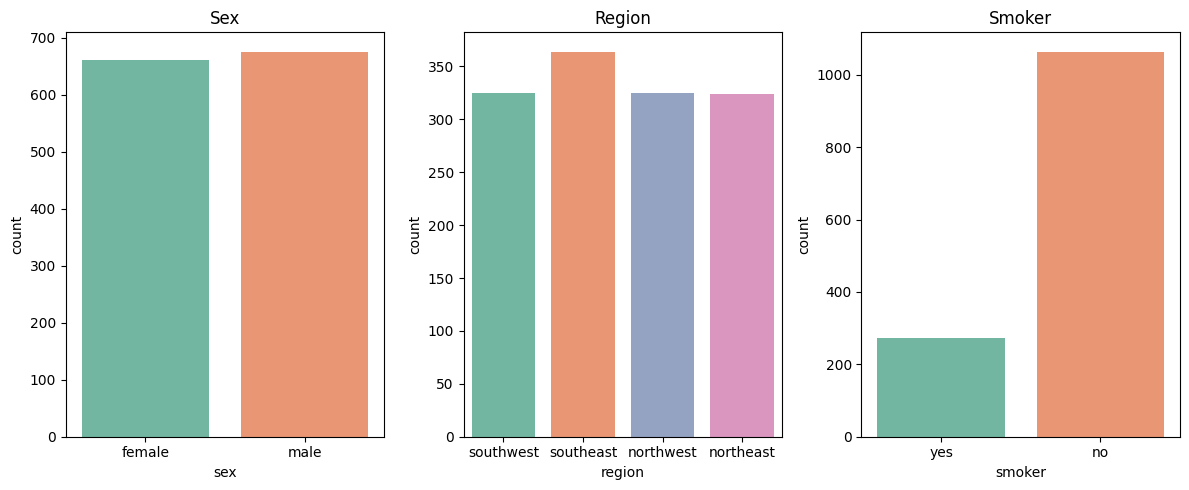

In [9]:
# Create subplots
fig, axes = plt.subplots(ncols=3, figsize=(12, 5))

# Define custom color palettes
palette = sns.color_palette("Set2")

# Plot 'sex' column
sns.countplot(data=df, x='sex', palette=palette, ax=axes[0])
axes[0].set_title("Sex")

# Plot 'region' column
sns.countplot(data=df, x='region', palette=palette, ax=axes[1])
axes[1].set_title("Region")

# Plot 'smoker' column
sns.countplot(data=df, x='smoker', palette=palette, ax=axes[2])
axes[2].set_title("Smoker")

plt.tight_layout()
plt.show()

#### Encoding Categorical Columns

In [10]:
# Changing binary categories to 1s and 0s
df['sex'] = df['sex'].map(lambda s :1  if s == 'female' else 0)
df['smoker'] = df['smoker'].map(lambda s :1  if s == 'yes' else 0)

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


In [11]:
df_new = pd.get_dummies(df, columns=['region'])
df_new.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,16884.92,False,False,False,True
1,18,0,33.8,1,0,1725.55,False,False,True,False
2,28,0,33.0,3,0,4449.46,False,False,True,False
3,33,0,22.7,0,0,21984.47,False,True,False,False
4,32,0,28.9,0,0,3866.86,False,True,False,False


<Axes: >

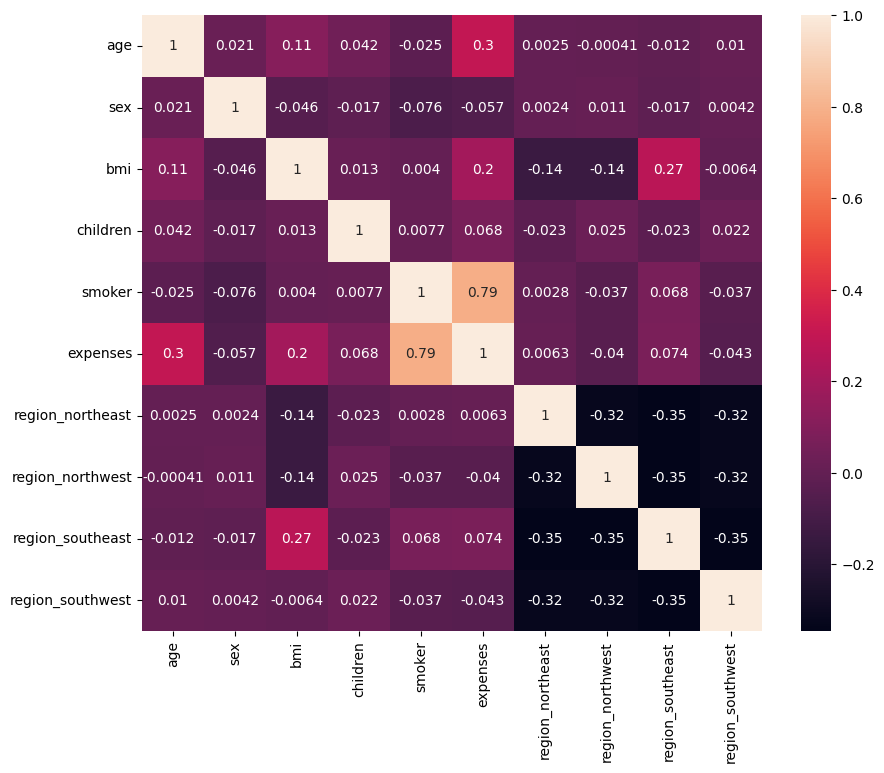

In [12]:
## correlation
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)

In [28]:
# palette=['#2DFFAB', '#EB5050'] 
# sns.set(style="ticks")
# sns.pairplot(data=df, hue='smoker', palette=palette)